<a href="https://colab.research.google.com/github/ClaudiOmatheuuss/explorando_seaborn/blob/main/EDA_Gorjetas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando base de dados

In [9]:
import pandas as pd

In [10]:
pd.read_csv('tips.csv')

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [11]:
# armazenando base em uma variável
dados = pd.read_csv('tips.csv')

In [12]:
dados.head(10)

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
5,25.29,4.71,No,Sun,Dinner,4
6,8.77,2.00,No,Sun,Dinner,2
7,26.88,3.12,No,Sun,Dinner,4
8,15.04,1.96,No,Sun,Dinner,2
9,14.78,3.23,No,Sun,Dinner,2


# Tradução

In [13]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [14]:
renomear = {
    'total_bill' : 'valor_da_conta',
    'tip' : 'gorjeta',
    'dessert' : 'sobremesa',
    'day' : 'dia_da_semana',
    'time' : 'hora_do_dia',
    'size' : 'total_de_pessoas'
}

In [15]:
type(dados)

pandas.core.frame.DataFrame

In [16]:
dados.head(1)

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2


In [17]:
# passando conteudo de dados para outra variavel porém com colunas renomeadas
gorjetas = dados.rename(columns = renomear)

In [18]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2


In [19]:
# Traduzindo campo: Sobremesa
gorjetas['sobremesa'].unique()

array(['No', 'Yes'], dtype=object)

In [20]:
sim_nao = {
    'No' : 'Não',
    'Yes' : 'Sim'
}

gorjetas.sobremesa.map(sim_nao)

0      Não
1      Não
2      Não
3      Não
4      Não
      ... 
239    Não
240    Sim
241    Sim
242    Não
243    Não
Name: sobremesa, Length: 244, dtype: object

In [21]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2


In [22]:
# usando o método map para mapear todos os valores em gorjetas.sobremesa e alterar usando o dicionário
gorjetas['sobremesa'] = gorjetas.sobremesa.map(sim_nao)

In [23]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Sun,Dinner,2


In [24]:
# Traduzindo campo : Dia da semana
gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [25]:
dias = {
    'Sun' : 'Domingo',
    'Sat' : 'Sabado',
    'Thur' : 'Quinta',
    'Fri' : 'Sexta'
}

In [26]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Sun,Dinner,2


In [27]:
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dias)

In [28]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Dinner,2


In [29]:
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sabado', 'Quinta', 'Sexta'], dtype=object)

In [30]:
# Traduzindo campo : hora_do_dia
gorjetas.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [31]:
horas = {
    'Dinner' : 'Jantar',
    'Lunch' : 'Almoço'
}

In [32]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Dinner,2


In [33]:
gorjetas['hora_do_dia'] = gorjetas['hora_do_dia'].map(horas)

In [34]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2


# Importando o Seaborn

In [35]:
# instalando lib
!pip install seaborn==0.9.0

In [36]:
# importando
import seaborn as sns

In [37]:
!pip show seaborn

Name: seaborn
Version: 0.9.0
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@nyu.edu
License: BSD (3-clause)
Location: /usr/local/lib/python3.10/dist-packages
Requires: matplotlib, numpy, pandas, scipy
Required-by: lida, missingno


# Análise I - Valor da conta e gorjeta

In [39]:
gorjetas.columns

Index(['valor_da_conta', 'gorjeta', 'sobremesa', 'dia_da_semana',
       'hora_do_dia', 'total_de_pessoas'],
      dtype='object')

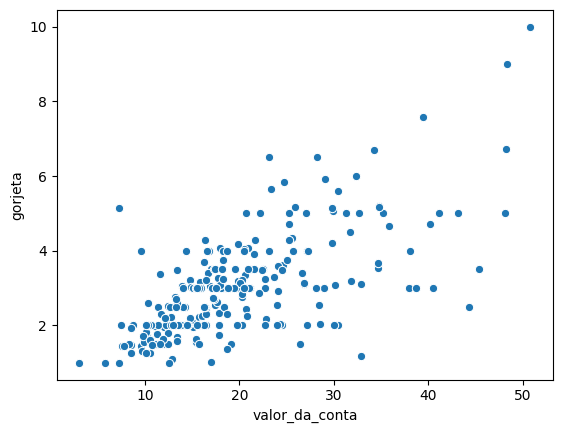

In [44]:
valor_gorjeta = sns.scatterplot(x='valor_da_conta', y='gorjeta', data=gorjetas)

**Visualmente, o valor da gorjeta aumenta conforme aumenta o valor da conta**

In [46]:
print('A base de dados contém {} registros. \n'.format(gorjetas.shape[0]))
print('Registros não-nulos: ')
gorjetas.count()   # faz contagem e retorna valores não-nulos em cada variável

A base de dados contém 244 registros. 

Registros não-nulos: 


valor_da_conta      244
gorjeta             244
sobremesa           244
dia_da_semana       244
hora_do_dia         244
total_de_pessoas    244
dtype: int64

## Criando o campo porcentagem

In [47]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2


In [48]:
# Esse campo irá servir para vermos se o valores de gorjeta e conta são diretamente proporcionais.
gorjetas['porcentagem'] = round(gorjetas['gorjeta'] / gorjetas['valor_da_conta'], 2)

In [52]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


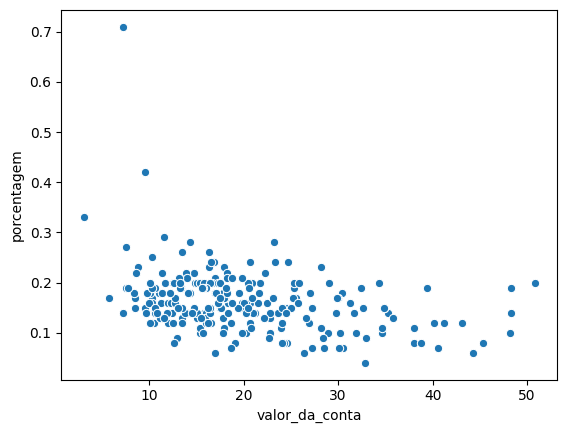

In [53]:
porcentagem_conta = sns.scatterplot(x='valor_da_conta', y='porcentagem', data=gorjetas)

**Visualmente, o valor da conta não é proporcional ao valor da gorjeta.**

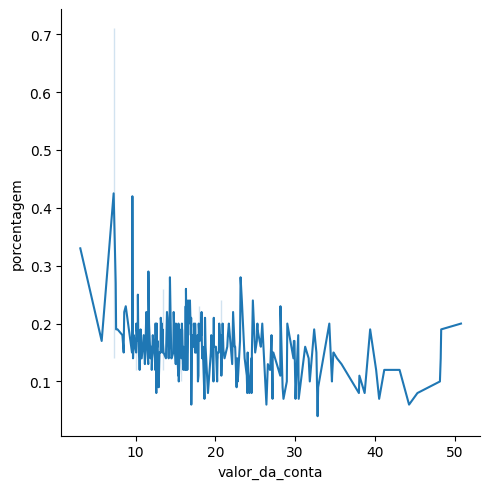

In [54]:
porcentagem_conta_linha = sns.relplot(x='valor_da_conta', y='porcentagem', kind='line', data=gorjetas)

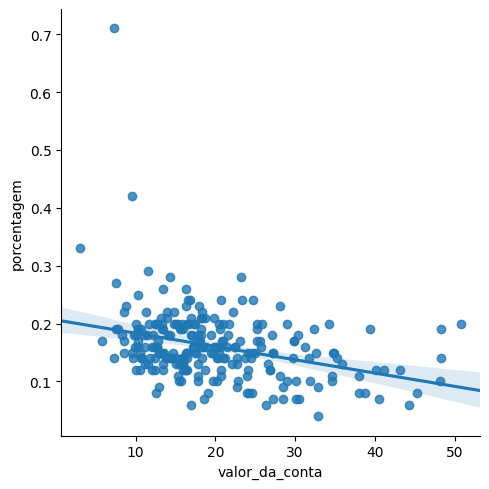

In [55]:
sns.lmplot(x='valor_da_conta', y='porcentagem', data=gorjetas)